# Aprendizaje de Máquina I - Trabajo Práctico Final

**Integrantes**:
- Federica Pavese (federica.pavese@gmail.com)
- Liliana Mariel Di Lanzo (lic.dilanzo@gmail.com)
- Pablo A. Salvagni (psalvagni@gmail.com )
- Pablo Maximiliano Lulic (maxisoad@gmail.com)
- Reinaldo Magallanes Saunders (rei.magallanes@gmail.com)


**Consigna**:
- El trabajo final de la cursada comprende de una investigación, desarrollo y resultados finales basados en un set de datos a elección por el grupo (máximo 6 personas).
- Los criterios de aprobación son los siguientes:
    - Obligación de trabajar en grupo mínimo de 2 y máximo de 6. Excepciones se pueden hacer mediante un correcto justificativo.
    - Cada TP debe citar la fuente de información de evaluación, es decir, citar de donde se obtuvieron los datos.
    - Puede ser entregado en cualquier formato, preferentemente en notebook de ipython (formato ipynb). También puede entregarse mediante un documento en Google Colab.
    - Contendrá la propuesta de investigación en los datos, citando el porqué de la evaluación y que se pretende encontrar o descubrir con dicha investigación
    - Deberá explicar el porqué de la elección del algoritmo empleado para la resolución del problema y cómo llegó a esa elección por sobre otras opciones
    - Deberá expresar de manera clara el resultado de la investigación aportando las métricas necesarias para comprender cómo se desempeña el algoritmo elegido.
    - El entregable debe venir con el código acompañado para su reproducibilidad.
    - En su cierre debe dar una reflexión de su investigación y proponer nuevos caminos de resolución en el caso de que sea necesario.
    - Como última fecha de entrega del trabajo, estará limitado a 7 días posteriores a la última clase.
    - La entrega es por el aula virtual, ya sea el envío del contenido o el link a repositorio (de GitHub o GitLab) con el trabajo.

--


## 1. Introducción y motivación

- **Fuente de información de evaluación**: Utilizaremos el dataset [Airline PAsssenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction), el cual comprende respuestas de la encuesta sobre la satisfaccion de pasajeros utilizando la aerolinea.

- **Objetivo**: Queremos predecir si los proximos pasajeros estan o no con satisfaccion positiva.

- **Problema de negocio**: Lorm p.

- **Enfoque**: Para abordar este problema utilizaremos técnicas de análisis de datos y machine learning para construir un modelo predictivo basado en el dataset disponible. Este modelo será validado y ajustado para asegurar su rendimiento y capacidad de generalización.

### Importación de librerías

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import optuna as optuna


## 2. Análisis expoloratorio inicial (EDA)

- Vista general de dataset

- Limpieza de columnas que no parecen servir.

- Separacion de numercias y categoricas

In [111]:
# importar datos
df = pd.read_csv('datasets/aerolineas/train.csv')

# visualizacion inicial
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [112]:
# Remover columna innecesaria
df = df.drop(columns=['Unnamed: 0'])

# obtener los tipos de cada columna
df.dtypes  


id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [113]:
# vista general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [114]:
# buscar faltantes, salvo Arrival Delay in Minutes que tiene muchos nulos, el resto no tienen.
df['Arrival Delay in Minutes'].isnull().sum()
# df.isna().mean ()*100 


np.int64(310)

In [115]:
#separo numericas y categoricas
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns

print("Columnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)

Columnas numéricas: Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')
Columnas categóricas: Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


In [116]:
#estadisticas base
# df.describe()

# balanceo entre clase
df['satisfaction'].value_counts()
df['satisfaction'].value_counts(normalize=True) * 100


satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64

In [117]:
df['satisfaction'].value_counts()
df['satisfaction'].value_counts(normalize=True) * 100

satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64

In [118]:
# Ver si hay Nulos en el dataset
df.isna().sum()

# Duplicados
df.duplicated().sum()

np.int64(0)

In [119]:
# Histogramas de Distribucion de variables numéricas

# for col in num_cols:
#     plt.figure()
#     df[col].hist(bins=20)
#     plt.title(f"Distribución de {col}")
#     plt.xlabel(col)
#     plt.ylabel("Frecuencia")
#     plt.show()

In [120]:
# Exploracion de variables categoricas
for col in cat_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True) * 100)



=== Gender ===
Gender
Female    52727
Male      51177
Name: count, dtype: int64
Gender
Female    50.745881
Male      49.254119
Name: proportion, dtype: float64

=== Customer Type ===
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64
Customer Type
Loyal Customer       81.732176
disloyal Customer    18.267824
Name: proportion, dtype: float64

=== Type of Travel ===
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64
Type of Travel
Business travel    68.962696
Personal Travel    31.037304
Name: proportion, dtype: float64

=== Class ===
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64
Class
Business    47.798930
Eco         44.988643
Eco Plus     7.212427
Name: proportion, dtype: float64

=== satisfaction ===
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64
satisfaction
neutral or dissatisfied    56.666731
satisfied

#### Segun las variables categoricas, pareceria que quienes contestan la encuesta, son mayoritariamente quienes viajan en primera, que predominan en la mayoria de los casos: 
- Customer Type

- Type of Travel 

- Class

In [ ]:
# analizar relacion de variables categoricas con la variable target
for col in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    print(f"\n=== {col} vs satisfaction ===")
    print(pd.crosstab(df[col], df['satisfaction'], normalize='index') * 100)



=== Gender vs satisfaction ===
satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                      57.262882  42.737118
Male                        56.052524  43.947476

=== Customer Type vs satisfaction ===
satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                   52.270881  47.729119
disloyal Customer                76.334229  23.665771

=== Type of Travel vs satisfaction ===
satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                41.740283  58.259717
Personal Travel                89.832243  10.167757

=== Class vs satisfaction ===
satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                    30.574852  69.425148
Eco                         81.386245  18.613755
Eco Plus                    75.393648  24.

In [ ]:

# exploracion de variables numericas
df[num_cols].describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


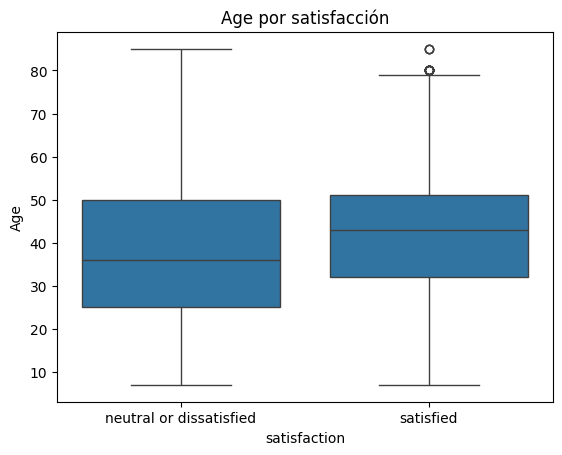

In [126]:
# comprarar numercias segun satisfaccion 
# buscar overlaps, diferencias, dispersion.

# for col in ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
for col in ['Age']:
    plt.figure()
    sns.boxplot(data=df, x='satisfaction', y=col)
    plt.title(f"{col} por satisfacción")
    plt.show()